# Quadratic Programming Solver

使用 python module: CVXOPT 來解決 QP 問題，CVXOPT 的 [使用說明](http://cvxopt.org/userguide/coneprog.html#quadratic-programming) 如下:

```
cvxopt.solvers.qp(P, q [, G, h [, A, b [, solver [, initvals ] ] ] ] )
```

$
\begin{align}
\min \ \            & \frac{1}{2} x^T \ P \ x + q^T x \\
\text{subject to: } & G x \le h \\
                    & A x = b \\
\end{align}
$

套入求解的問題:

$
\begin{align}
\min \ \ & 2 x_1^2 + x_2^2 + x_1 x_2 + x_1 + x_2 \\
\text{subject to: } & x_1 \ge 0 \\
                    & x_2 \ge 0 \\
                    & x_1 + x_2 = 1
\end{align}
$

$ \frac{1}{2} \begin{bmatrix} x_1 & x_2 \end{bmatrix} $
$ \begin{bmatrix} 4 & 1 \\ 1 & 2 \end{bmatrix} $
$ \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = $
$ \frac{1}{2} \begin{bmatrix} x_1 & x_2 \end{bmatrix} $
$ \begin{bmatrix} 4 x_1 + x_2 \\ x_1 + 2 x_2 \end{bmatrix} = $
$ 2 x_1^2 + x_2^2 + x_1 x_2 $

所以 P = $ \begin{bmatrix} 4 & 1 \\ 1 & 2 \end{bmatrix} $

$ \vec{q} $ 是求解方程式的一次項係數 $ 1 x_1 + 1 x_2 $, 所以 q = $ \begin{bmatrix} 1 \\ 1 \end{bmatrix} $，使得:

$ q^T \vec{x} = \begin{bmatrix} 1 & 1 \end{bmatrix} $
$ \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $

$ x_1 \ge 0, \ x_2 \ge 0 \iff - x_1 \le 0, \ - x_2 \le 0 $

$ G x \le h \iff $
$ \begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix} $
$ \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = $
$ \begin{bmatrix} - x_1 \\ - x_2 \end{bmatrix} \le $
$ \begin{bmatrix} 0 \\ 0 \end{bmatrix} $

$ A x = b \iff $
$ \begin{bmatrix} 1 & 1 \\ 0 & 0 \end{bmatrix} $
$ \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = $
$ \begin{bmatrix} 1 \\ 0 \end{bmatrix} $

In [1]:
from cvxopt import matrix, solvers, printing
printing.options['dformat'] = '%.2f'

P = 2*matrix([ [2, .5], [.5, 1] ])
q = matrix([1.0, 1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([ 0.0 , 0.0 ])
A = matrix([1.0, 1.0], (1,2))
b = matrix(1.0)
sol=solvers.qp(P=P, q=q, G=G, h=h, A=A, b=b)

print(sol['x'])

# 2 x1^2 + x2^2 + x1 x2 + x1 + x2
# x1 >= 0
# x2 >= 0
# x1 + x2 = 1

print('P: \n%s' % P) # 求解二次項係數 ?
print('q: \n%s' % q) # 求解一次項係數 1, 1
print('G: \n%s' % G) # 一次不等式條件
print('h: \n%s' % h) # 一次不等式常數
print('A: \n%s' % A) # 一次等式條件
print('b: \n%s' % b) # 一次等式常數

print('optimize x:\n%s' % sol['x'])

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  3e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  1e-16  5e-08
Optimal solution found.
[0.25]
[0.75]

P: 
[4.00 1.00]
[1.00 2.00]

q: 
[1.00]
[1.00]

G: 
[-1.00  0.00]
[ 0.00 -1.00]

h: 
[0.00]
[0.00]

A: 
[1.00 1.00]

b: 
[1.00]

optimize x:
[0.25]
[0.75]



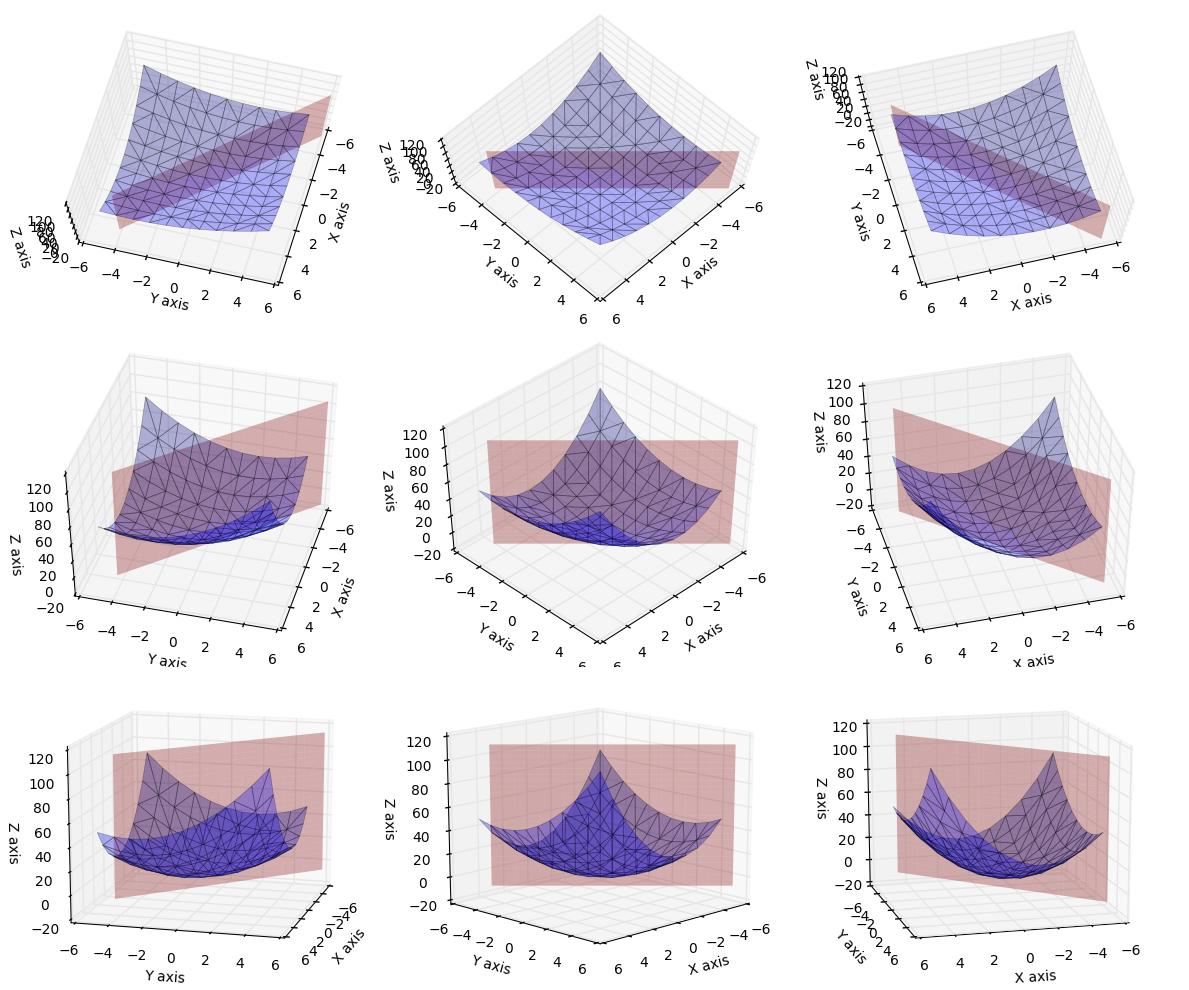

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10), subplot_kw={'projection':'3d'})
fig.figsize=(8,8)
plt.tight_layout()

def mypoly(x1, x2):
    return 2 * math.pow(x1,2) + math.pow(x2,2) + x1 * x2 + x1 + x2

def draw_graph(pos, angle):
    ax = axes[pos[0]][pos[1]]
    x = np.arange(-5,6)
    y = np.arange(-5,6)
    xys = [(xi,yi,mypoly(xi,yi)) for yi in y for xi in x]
    xs = [i[0] for i in xys]
    ys = [i[1] for i in xys]
    zs = [i[2] for i in xys]
    
    ax.plot_trisurf(xs, ys, zs, linewidth=0.5, antialiased=True, alpha=0.3)
    
    p2_x = np.arange(-5,6)
    p2_z = np.arange(-5,120,5)
    
    X,Z = np.meshgrid(p2_x, p2_z)
    Y = 1 - X
    ax.plot_surface(X, Y, Z, linewidth=0, rstride=1, cstride=1, antialiased=True, alpha=0.3, color='R')

    ax.view_init(angle[0], angle[1])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

amid, adiff = (45, 30)
draw_graph(pos=(0,0), angle=(amid+adiff,amid-adiff))
draw_graph(pos=(0,1), angle=(amid+adiff,amid))
draw_graph(pos=(0,2), angle=(amid+adiff,amid+adiff))

draw_graph(pos=(1,0), angle=(amid,amid-adiff))
draw_graph(pos=(1,1), angle=(amid,amid))
draw_graph(pos=(1,2), angle=(amid,amid+adiff))

draw_graph(pos=(2,0), angle=(amid-adiff,amid-adiff))
draw_graph(pos=(2,1), angle=(amid-adiff,amid))
draw_graph(pos=(2,2), angle=(amid-adiff,amid+adiff))

plt.show()